# This notebook has code written for use in the 2nd year project paper

In [13]:
#All of the imports and definitions
import numpy as np
from pragmaticModels import PragmaticModel
import utilities as util
from utilities import lexToMappingsRSAEquiv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## RSA vs. Epistmeic for Frank and Goodman 2012 basic scalar implicature

----------------------------------------------------
RSA predictions
             Blue Square   Blue Circle  Green Square
    'Blue'        0.3846        0.6154           0.0
   'Green'           0.0           0.0           1.0
  'Circle'           0.0           1.0           0.0
  'Square'        0.3846           0.0        0.6154

----------------------------------------------------
Epistemic Predictions
             Blue Square   Blue Circle  Green Square
    'Blue'        0.3404        0.5936         0.066
   'Green'        0.0542        0.0946        0.8512
  'Circle'        0.0542        0.8512        0.0946
  'Square'        0.3404         0.066        0.5936



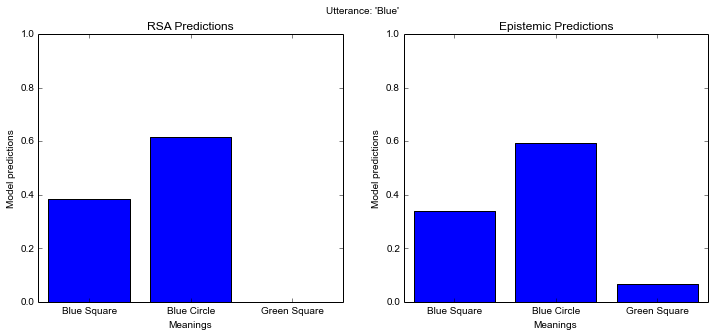

In [23]:
import pragmaticModels
reload( pragmaticModels)
from pragmaticModels import PragmaticModel
pri=[.2,.4,.4]#Frank and Goodman 2012 rough empirical priors
lex=[[1,1,0],[0,0,1],[0,1,0],[1,0,1]]#Frank and Goodman 2012 full lexicon
means=["Blue Square", "Blue Circle", "Green Square"]
utts= ["\'Blue\'","\'Green\'","\'Circle\'","\'Square\'"]
mapps = lexToMappingsRSAEquiv(lex, pri, .1) #RSA style relaxation for this lexicon
#mapps=np.array([[0.8, 0.1, 0.1],[0.1,0.1,0.8]])
rsaTest = PragmaticModel(modelType="RSA", lexicon=lex, meaningPriors=pri, alpha=1, meanings=means, utterances=utts)
epistTest = PragmaticModel(modelType="BeliefDecay", mappings=mapps, meaningPriors=pri, beliefStrength=1, meanings=means, utterances=utts)
rsaTest.display_listener_matrix(rsaTest.iterate(3), title="RSA predictions")
epistTest.display_listener_matrix(epistTest.iterate(2), title="Epistemic Predictions")

#Plotting Code
#fig = plt.figure()
#fig = plt.gcf()
size = fig.get_size_inches()
plt.figure(figsize=(size[0]*2,size[0]*0.8))
gs = gridspec.GridSpec(1,2)
plt.suptitle("Utterance: \'Blue\'")

toPlot=rsaTest.iterate(3)[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=rsaTest.meanings
locs=range(len(toPlot))
ax = plt.subplot(gs[0])
ax.bar(locs,toPlot, align='center')
ax.set_xlabel("Meanings")
ax.set_ylabel("Model predictions")
ax.set_title("RSA Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])

#pos1 = ax.get_position() # get the original position 
#pos2 = [pos1.x0 + 1.3, pos1.y0 + 0.0,  pos1.width / 1.0, pos1.height / 1.0] 
#ax.set_position(pos2)

ax2 = plt.subplot(gs[1])
toPlot=epistTest.iterate(2)[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTest.meanings
locs=range(len(toPlot))
ax2.bar(locs,toPlot, align='center')
ax2.set_xlabel("Meanings")
ax2.set_ylabel("Model predictions")
ax2.set_title("Epistemic Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])
#ax2.set_position(pos2)
#ax.set_position(pos1)
#plt.figure(2)
plt.show()

## Original Epistemic vs. Epistemic with extended language for Frank and Goodman 2012 basic scalar implicature
### Part 1: unlikely referents given langauge

This example illustrates what it looks like to add additional referents that are not likely given the utterance, but are not a priori unlikely as well as with additional utterances that have a low probability of referring to the relevant objects.

As is apparant below, the predicitons do not vary much. This illustrates the insensitivity to model extension with meanings that have a low probability given the speaker-produced utterance.

The RSA model is not capable of this, as it does not have a means by which to represent different conditional probabilities over utterances given meanings (different strengths of lingusitic mappings).

----------------------------------------------------
Original Epistemic Predictions
             Blue Square   Blue Circle  Green Square
    'Blue'        0.3404        0.5936         0.066
   'Green'        0.0542        0.0946        0.8512
  'Circle'        0.0542        0.8512        0.0946
  'Square'        0.3404         0.066        0.5936

-------------------------------------------------------------------------------------------------
Expanded Epistemic Predictions
                  Blue Square      Blue Circle     Green Square  Orange Triangle      Red Hexagon
      'Blue'           0.3326             0.58           0.0644           0.0115           0.0115
     'Green'           0.0529           0.0923           0.8309           0.0119           0.0119
    'Circle'           0.0529           0.8309           0.0923           0.0119           0.0119
    'Square'           0.3326           0.0644             0.58           0.0115           0.0115
  'Triangle'           0.0064  

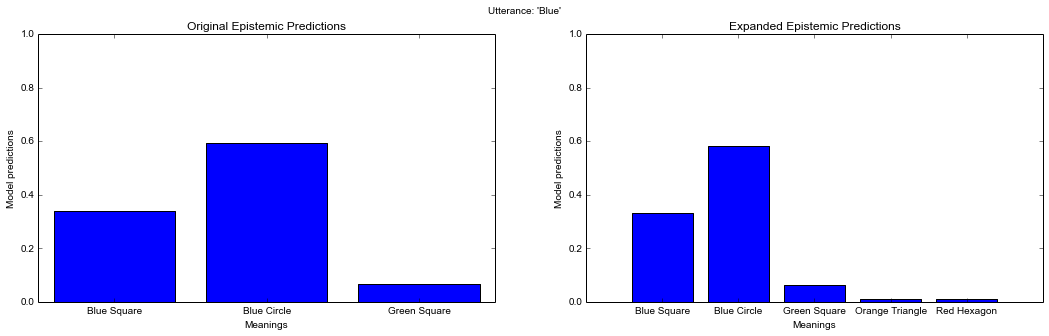

In [26]:
import pragmaticModels
reload( pragmaticModels)
from pragmaticModels import PragmaticModel
origPri=[.2,.4,.4]#Frank and Goodman 2012 rough empirical priors
lex=[[1,1,0],[0,0,1],[0,1,0],[1,0,1]]#Frank and Goodman 2012 full lexicon
origMeans=["Blue Square", "Blue Circle", "Green Square"]
origUtts= ["\'Blue\'","\'Green\'","\'Circle\'","\'Square\'"]
origMaps = lexToMappingsRSAEquiv(lex, origPri, .1) #RSA style relaxation for this lexicon

newMapps = np.append(origMaps, np.array([[0.01,0.01,0.01,0.01]]), axis=0)
newMapps = np.append(newMapps, np.array([[0.01,0.01,0.01,0.01]]), axis=0)
newMapps = np.append(newMapps, np.array([[0.01],[0.01],[0.01],[1.0],[0.01]]), axis=1)
newMapps = np.append(newMapps, np.array([[0.01],[0.01],[0.01],[0.01],[1.0]]), axis=1)

newPriUnNorm=np.array(origPri + [0.3, 0.3])
newPri=newPriUnNorm/sum(newPriUnNorm)
newMeans=["Blue Square", "Blue Circle", "Green Square", "Orange Triangle", "Red Hexagon"]
newUtts= ["\'Blue\'","\'Green\'","\'Circle\'","\'Square\'","\'Triangle\'", "\'Hexagon\'"]

#mapps=np.array([[0.8, 0.1, 0.1],[0.1,0.1,0.8]])
epistTestOrig = PragmaticModel(modelType="BeliefDecay", mappings=origMaps, meaningPriors=origPri, beliefStrength=1, meanings=origMeans, utterances=origUtts)
epistTestNew = PragmaticModel(modelType="BeliefDecay", mappings=newMapps, meaningPriors=newPri, beliefStrength=1, meanings=newMeans, utterances=newUtts)

originalPreds=epistTestOrig.iterate(2)
newPreds=epistTestNew.iterate(2)
epistTestOrig.display_listener_matrix(originalPreds, title="Original Epistemic Predictions")
epistTestNew.display_listener_matrix(newPreds, title="Expanded Epistemic Predictions")

#Plotting Code
#fig = plt.figure()
#fig = plt.gcf()
size = fig.get_size_inches()
plt.figure(figsize=(size[0]*3,size[0]*0.8))
gs = gridspec.GridSpec(1,2)
plt.suptitle("Utterance: \'Blue\'")

toPlot=originalPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTestOrig.meanings
locs=range(len(toPlot))
ax = plt.subplot(gs[0])
ax.bar(locs,toPlot, align='center')
ax.set_xlabel("Meanings")
ax.set_ylabel("Model predictions")
ax.set_title("Original Epistemic Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])

#pos1 = ax.get_position() # get the original position 
#pos2 = [pos1.x0 + 1.3, pos1.y0 + 0.0,  pos1.width / 1.0, pos1.height / 1.0] 
#ax.set_position(pos2)

ax2 = plt.subplot(gs[1])
toPlot=newPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTestNew.meanings
locs=range(len(toPlot))
ax2.bar(locs,toPlot, align='center')
ax2.set_xlabel("Meanings")
ax2.set_ylabel("Model predictions")
ax2.set_title("Expanded Epistemic Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])
#ax2.set_position(pos2)
#ax.set_position(pos1)
#plt.figure(2)
plt.show()

### Part 2: Unlikely meanings a priori

The following is designed to illustrate the scenario where the meanings are unlikely a priori (as in the case where they are not visible to the speaker or to the listener and are therefore not visible a priori.

Here the predicitons for the additional meanings are low even though they are not unlikely given the utterance. It illustrates how the epistemic model allows us to build relevance theoretic and salience-based predictions into the model framework.

----------------------------------------------------
Original Epistemic Predictions
             Blue Square   Blue Circle  Green Square
    'Blue'        0.3404        0.5936         0.066
   'Green'        0.0542        0.0946        0.8512
  'Circle'        0.0542        0.8512        0.0946
  'Square'        0.3404         0.066        0.5936

---------------------------------------------------------------------------------------
Expanded Epistemic Predictions
                Blue Square    Blue Circle   Green Square  Blue Triangle     Red Square
      'Blue'         0.3284         0.5966         0.0663         0.0078         0.0009
     'Green'         0.0521         0.0945         0.8509         0.0012         0.0012
       'Red'         0.2053          0.373          0.373         0.0049         0.0438
    'Circle'         0.0521         0.8509         0.0945         0.0012         0.0012
    'Square'         0.3284         0.0663         0.5966         0.0009         0.0078
  '

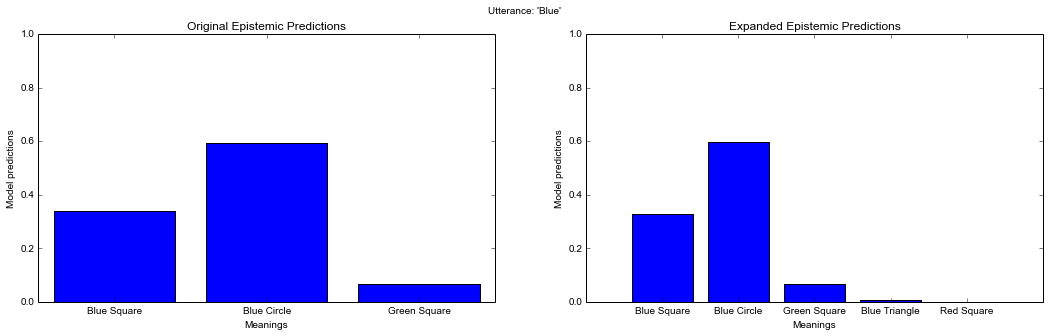

In [28]:
import pragmaticModels
reload( pragmaticModels)
from pragmaticModels import PragmaticModel
origPri=[.2,.4,.4]#Frank and Goodman 2012 rough empirical priors
origLex=[[1,1,0],[0,0,1],[0,1,0],[1,0,1]]#Frank and Goodman 2012 full lexicon
origMeans=["Blue Square", "Blue Circle", "Green Square"]
origUtts= ["\'Blue\'","\'Green\'","\'Circle\'","\'Square\'"]
origMaps = lexToMappingsRSAEquiv(origLex, origPri, .1) #RSA style relaxation for this lexicon

newLex=[[1,1,0,1,0],[0,0,1,0,0],[0,0,0,0,1],[0,1,0,0,0],[1,0,1,0,1],[0,0,0,1,0]]#Frank and Goodman 2012 full lexicon
newPriUnNorm=np.array(origPri + [0.01, 0.01])
newPri=newPriUnNorm/sum(newPriUnNorm)
newMaps = lexToMappingsRSAEquiv(newLex, newPri, .1) #RSA style relaxation for this lexicon
newMeans=["Blue Square", "Blue Circle", "Green Square", "Blue Triangle", "Red Square"]
newUtts= ["\'Blue\'","\'Green\'","\'Red\'","\'Circle\'","\'Square\'","\'Triangle\'"]

#mapps=np.array([[0.8, 0.1, 0.1],[0.1,0.1,0.8]])
epistTestOrig = PragmaticModel(modelType="BeliefDecay", mappings=origMaps, meaningPriors=origPri, beliefStrength=1, meanings=origMeans, utterances=origUtts)
epistTestNew = PragmaticModel(modelType="BeliefDecay", mappings=newMaps, meaningPriors=newPri, beliefStrength=1, meanings=newMeans, utterances=newUtts)

originalPreds=epistTestOrig.iterate(2)
newPreds=epistTestNew.iterate(2)
epistTestOrig.display_listener_matrix(originalPreds, title="Original Epistemic Predictions")
epistTestNew.display_listener_matrix(newPreds, title="Expanded Epistemic Predictions")

#Plotting Code
#fig = plt.figure()
#fig = plt.gcf()
size = fig.get_size_inches()
plt.figure(figsize=(size[0]*3,size[0]*0.8))
gs = gridspec.GridSpec(1,2)
plt.suptitle("Utterance: \'Blue\'")

toPlot=originalPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTestOrig.meanings
locs=range(len(toPlot))
ax = plt.subplot(gs[0])
ax.bar(locs,toPlot, align='center')
ax.set_xlabel("Meanings")
ax.set_ylabel("Model predictions")
ax.set_title("Original Epistemic Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])

#pos1 = ax.get_position() # get the original position 
#pos2 = [pos1.x0 + 1.3, pos1.y0 + 0.0,  pos1.width / 1.0, pos1.height / 1.0] 
#ax.set_position(pos2)

ax2 = plt.subplot(gs[1])
toPlot=newPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTestNew.meanings
locs=range(len(toPlot))
ax2.bar(locs,toPlot, align='center')
ax2.set_xlabel("Meanings")
ax2.set_ylabel("Model predictions")
ax2.set_title("Expanded Epistemic Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])
#ax2.set_position(pos2)
#ax.set_position(pos1)
#plt.figure(2)
plt.show()

**Of course, this is not too different from the predictions of an equivalent RSA model.**

**This can be seen below:**

---------------------------------------------------------------------------------------
Expanded RSA Predictions
                Blue Square    Blue Circle   Green Square  Blue Triangle     Red Square
      'Blue'         0.3284         0.5966         0.0663         0.0078         0.0009
     'Green'         0.0521         0.0945         0.8509         0.0012         0.0012
       'Red'         0.2053          0.373          0.373         0.0049         0.0438
    'Circle'         0.0521         0.8509         0.0945         0.0012         0.0012
    'Square'         0.3284         0.0663         0.5966         0.0009         0.0078
  'Triangle'         0.2053          0.373          0.373         0.0438         0.0049



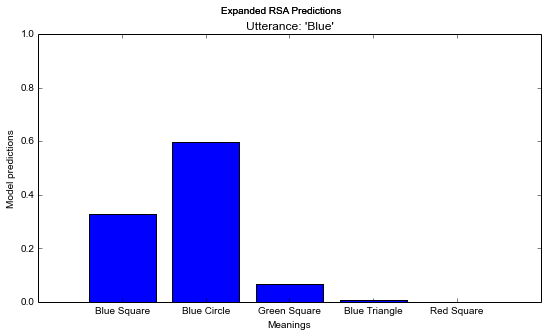

In [30]:
rsaTestNew = PragmaticModel(modelType="RSA", lexicon=newLex, meaningPriors=newPri, meanings=newMeans, utterances=newUtts)
newRSAPreds=epistTestNew.iterate(2)
rsaTestNew.display_listener_matrix(newRSAPreds, title="Expanded RSA Predictions")


#Plotting Code
#fig = plt.figure()
#fig = plt.gcf()
size = fig.get_size_inches()
plt.figure(figsize=(size[0]*1.5,size[0]*0.8))
gs = gridspec.GridSpec(1,2)
plt.suptitle("Utterance: \'Blue\'")

toPlot=newRSAPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=rsaTestNew.meanings
locs=range(len(toPlot))
plt.bar(locs,toPlot, align='center')
plt.xlabel("Meanings")
plt.ylabel("Model predictions")
plt.title("Utterance: \'Blue\'") 
plt.suptitle("Expanded RSA Predictions")
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])
#plt.figure(2)
plt.show()

**However, the epistemic model allows much more flexibility than the RSA model even here.**

This is because of the interaction between the priors and the likelihoods. Although the epistemic and RSa model treat priors equivalently, the fact that the priors interact with the likelihoods allows for a low prior probability meaning to still have a non-trivial prediciton if the probability of that meaning given the utterance is sufficiently high